# Статистические функции Python

Для начала разогреемся

## Сравнение наборов данных
Импортируйте данные из файла

In [9]:
import pandas as pd

In [12]:
df = pd.read_csv('datasets.csv', sep=';')
df.head()

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47


Давайте посмотрим на среднее

А теперь на среднеквадратичное отклонение

## Биномиальное распределение

Давайте предположим, что мы хотим провести эксперимент с новым лекарственным препаратом

In [26]:
# импорт необходимых библиотек
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks

Предположим, у нас есть препарат, который излечивает людей с вероятностью 50%. Т.е. конверсия в здорового человека 0.5.

In [72]:
current_pill_efficiency = 0.5

И теперь мы разработали новый препарат, который был протестирован на N пациентах и вот какие результаты мы получили (`1`-вылечили, `0`-не вылечили):

In [73]:
new_pill_efficiency = [1,1,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,0,0,0,1]

Давайте посчитаем конверсию

In [74]:
print(f'{sum(new_pill_efficiency)} conversions out of {len(new_pill_efficiency)}')

35 conversions out of 60


In [40]:
print(f'new pill conversion efficiency is {sum(new_pill_efficiency)/len(new_pill_efficiency)}')

new pill conversion efficiency is 0.5833333333333334


А как понять, статистически значимое это отклонение или нет?

Для начала давайте визуализируем биномиальное распределение c характеристиками 
- `n = 60`
- `p = 0.5`

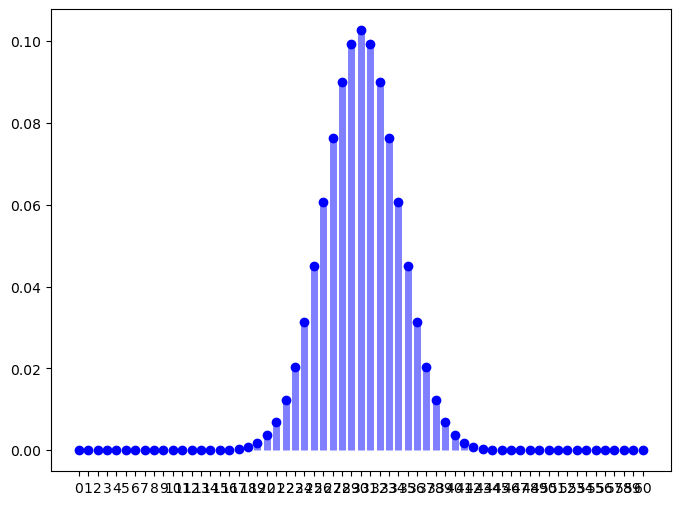

In [41]:
n, p = 60, 0.5
x = [i for i in range(61)]
fig, ax = plt.subplots(1, 1,figsize=(8, 6));
ax.plot(x, binom.pmf(x, n, p), 'bo', label='binom pmf');
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5);
locs, labels = xticks();
xticks(np.arange(61));

А теперь посмотрим на кумулятивную функцию распределения. Ответим на вопрос, чему равна вероятность, что функция от случайной величины примет значение равное или меньшее x.

Посмотрим на функцию распределения

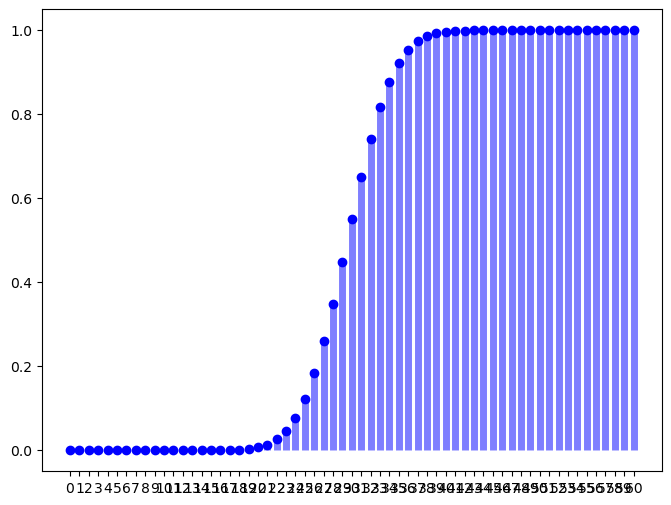

In [54]:
n, p = 60, 0.5
x = [i for i in range(61)]
fig, ax = plt.subplots(1, 1,figsize=(8, 6));
ax.plot(x, binom.cdf(x, n, p), 'bo', label='binom pmf');
ax.vlines(x, 0, binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5);
locs, labels = xticks();
xticks(np.arange(61));

In [42]:
print(binom.cdf(k=35,n=60,p=0.5))
print(1 - binom.cdf(k=35,n=60,p=0.5))

0.9224990479983697
0.07750095200163032


В статистике принято брать критерий `альфа = 5%`, чему в этом случае будет равно `x` Воспользуемся квантилями - значение, которое случайная величина не превышает с вероятностью p. Нас интересует квантиль `0,05`. При помощи функции `ppf` посчитайте значение `x`, чтобы вероятность случайной величины, распределенной по биномиальному распределению, быть большей или равной `x`, была равна `0,05`.

In [6]:
binom.ppf?

Signature: binom.ppf(q, *args, **kwds)
Docstring:
Percent point function (inverse of `cdf`) at q of the given RV.

Parameters
----------
q : array_like
    Lower tail probability.
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information).
loc : array_like, optional
    Location parameter (default=0).

Returns
-------
k : array_like
    Quantile corresponding to the lower tail probability, q.
File:      ~/anaconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method

In [47]:
binom.ppf(0.95, n=60, p=0.5)

36.0

а есть ли специфика работы с дискретным распределением?
в данном случае мы будем говорить, что не будет превышения с вероятностью хотя бы p

In [44]:
alpha_max = 0.05

x = binom.ppf(1-alpha_max, n=60, p=0.5)
print(x)

36.0


Вероятность получить 36+ не превышает 5%

In [48]:
critical_value = binom.ppf(1-alpha_max, n=60, p=0.5) + 1
critical_value

37.0

И теперь давайте создадим наш критерий!

In [62]:
def get_binom_criterion(n,mu=0.5,alpha=0.05):
    '''Формирует критерий
    
    Параметры:
        n: количество пациентов в эксперименте
        mu: вероятность вылечить
        alpha: уровень значимости криетерия
        
    Возвращает:
        Значение критерия
        
    '''
    binom_h0 = binom(n=n,p=mu)
    c = binom_h0.ppf(1-alpha)
    return c+1

In [57]:
print(f'if C>=',get_binom_criterion(n=60,mu=0.5,alpha=0.05), 'then reject H0')

if C>= 37.0 then reject H0


А теперь давайте скорректируем наши вводные

In [58]:
binom_h0 = binom(
    n=60,
    p=0.2
)

In [59]:
binom_h0.rvs()

12

График распределения

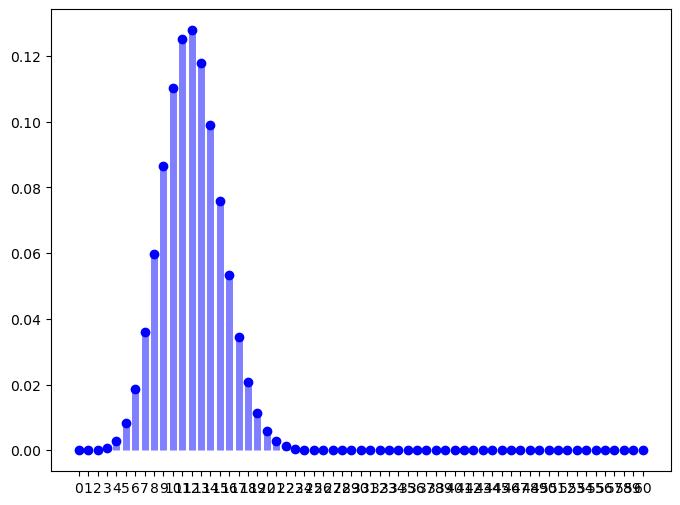

In [60]:
n, p = 60, 0.2
x = [i for i in range(61)]
fig, ax = plt.subplots(1, 1,figsize=(8, 6));
ax.plot(x, binom.pmf(x, n, p), 'bo', label='binom pmf');
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5);
locs, labels = xticks();
xticks(np.arange(61));

In [61]:
print(f'if C>=',get_binom_criterion(n=60,mu=0.2,alpha=0.05), 'then reject H0')

if C>= 18.0 then reject H0


А теперь давайте унифицируем расчеты и перейдем к p-value

In [65]:
def p_value_binom(n,q,mu=0.5):
    ''' Считает p-value
    
    Параметры:
        n: количество пациентов
        q: количество выздоровевших
    
    Возвращает:
        p-value для критерия
    '''
    
    binom_h0 = binom(n=n,p=mu)
    return 1 - binom_h0.cdf(q-1)

In [71]:
print(f'if {p_value_binom(n=60,mu=0.5,q=37):0.5} <= alpha, then reject H0')

if 0.04623 <= alpha, then reject H0


## Работа с ростом